<a href="https://colab.research.google.com/github/brutusdev/Desafio-projeto-dio-everisNewTalents-2/blob/main/C%C3%B3pia_de_IA_Monitoramento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalando a biblioteca Fuzzy
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=999cd1f683e2da395521cc6b0395455fa5e7870cdab6165a2be7113318396042
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
# Importando Bibliotecas Essenciais
import numpy as np
import skfuzzy as fuzz # Importando biblioteca Fuzzy
from skfuzzy import control as ctrl # Importando biblioteca de controle do Fuzzy
import pandas as pd
import matplotlib.pyplot as plt # Gera gráficos com os dados
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

In [ ]:
# Buscando os dados em arquivo excel
dados = pd.read_excel('/content/Dados-IA-Monitoração-2.xlsx')

In [ ]:
# Inicia as variáveis buscando dados por colunas
result = dados['ResultCode']
time = dados['DurationMs']
req = dados['requests']
success = dados['Success']


Função Antecedente x Consequente

In [ ]:
result = ctrl.Antecedent(result, 'result')
time = ctrl.Antecedent(time, 'time')
req = ctrl.Antecedent(req, 'req')
success = ctrl.Antecedent(success, 'success')

In [ ]:
slo = ctrl.Consequent(np.arange(0, 21, 1), 'slo')

Funções Membership

In [ ]:

result.automf(number = 3, names = ['bom', 'atencao', 'ruim'])
time.automf(number = 3, names = ['baixa', 'media', 'alta'])
req.automf(number = 3, names = ['baixa', 'media', 'alta'])
success.automf(number = 2, names = ['bom', 'ruim'])

Membership functions

In [ ]:
#função triangular
slo['bom'] = fuzz.trimf(slo.universe, [0, 0, 10])
slo['ruim'] = fuzz.trimf(slo.universe, [10, 20, 20])

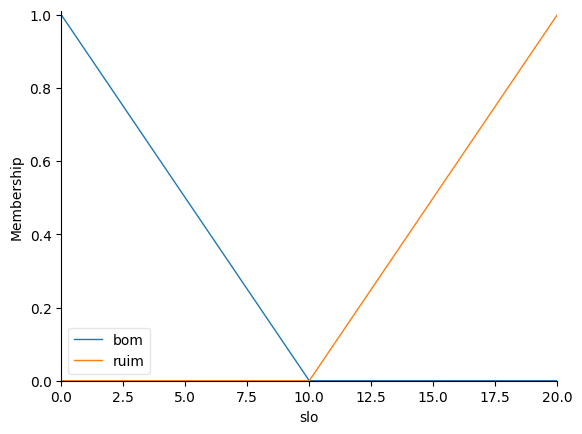

In [ ]:
slo.view()

In [ ]:
regra1 = ctrl.Rule(result['bom'] | req['baixa'] | time['baixa'] | success['bom'] , slo['bom'])
regra2 = ctrl.Rule(result['bom'] | time['baixa'] | success['bom'] , slo['bom'])
regra3 = ctrl.Rule(result['atencao'] | time['media'] | success['ruim'], slo['ruim'])
regra4 = ctrl.Rule(result['ruim'] | success['ruim'], slo['ruim'])
regra5 = ctrl.Rule(req['baixa'] | time['baixa'] | success['bom'], slo['bom'])
regra6 = ctrl.Rule(req['media'] | time['media'] | success['bom'], slo['bom'])
regra7 = ctrl.Rule(req['alta'] | time['alta'] | success['bom'], slo['ruim'])
regra8 = ctrl.Rule(req['alta'] | time['alta'] | success['ruim'], slo['ruim'])
regra9 = ctrl.Rule(success['bom'] | time['baixa'], slo['bom'])


Sistemas de Controle

In [ ]:
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])

In [ ]:
sistema = ctrl.ControlSystemSimulation(sistema_controle)

In [ ]:
sistema.input['result'] = 400
sistema.input['req'] = 250
sistema.input['time'] = 200
sistema.input['success'] = 1
sistema.compute()

In [ ]:
resultados_lista = []

for i in range(len(dados)):
    resultado = sistema.input['result'] = dados['ResultCode'][i]
    req_value = sistema.input['req'] = dados['requests'][i]
    time_value = sistema.input['time'] = dados['DurationMs'][i]
    success_value = sistema.input['success'] = dados['Success'][i]

    # Obtém o resultado
    resultado_slo = sistema.output['slo']

    # Adiciona o resultado à lista
    resultados_lista.append(resultado_slo)

# Imprime a lista de resultados
print("Lista de resultados:", resultados_lista)

Lista de resultados: [11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291, 11.668193801905291

In [ ]:
# Adiciona a lista de resultados como uma nova coluna no DataFrame 'dados'
dados['Resultados'] = resultados_lista

# Salva o DataFrame atualizado em um novo arquivo Excel
dados.to_excel('/content/Dados-IA-Monitoração-2.xlsx', index=False)


In [ ]:
dados.head()

,ResultCode,DurationMs,requests,Success,Resultados
0,200,200,2285,1,11.668194
1,200,166,485,1,11.668194
2,200,569,259,1,11.668194
3,200,264,488,1,11.668194
4,200,287,342,1,11.668194


11.668193801905291


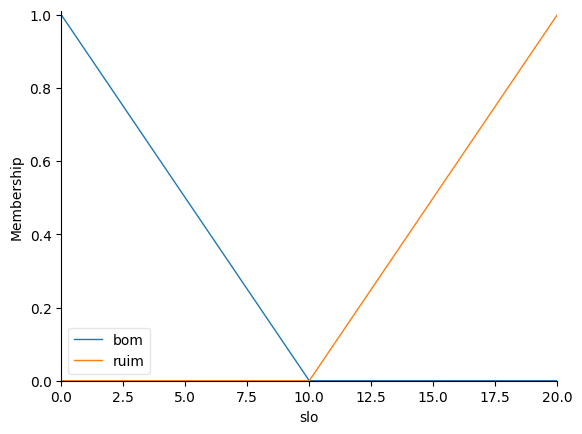

In [ ]:
print(sistema.output['slo'])
slo.view(sim = sistema)

Analise de IA Opção *1*

In [ ]:


# Carrega os dados
dados = pd.read_excel('/content/Dados-IA-Monitoração-2.xlsx')

# Inicia as variáveis buscando dados por colunas
result = ctrl.Antecedent(np.arange(0, 300, 1), 'result')
time = ctrl.Antecedent(np.arange(0, 1000, 1), 'time')
req = ctrl.Antecedent(np.arange(0, 3000, 1), 'req')
success = ctrl.Antecedent(np.arange(0, 2, 1), 'success')
slo = ctrl.Consequent(np.arange(0, 2, 1), 'slo')

result.automf(number=3, names=['bom', 'atencao', 'ruim'])
time.automf(number=3, names=['baixa', 'media', 'alta'])
req.automf(number=3, names=['baixa', 'media', 'alta'])
success.automf(number=2, names=['bom', 'ruim'])


slo.universe = np.arange(0, 21, 1)
# Função triangular
slo['bom'] = fuzz.trimf(slo.universe, [1, 1, 1])
slo['ruim'] = fuzz.trimf(slo.universe, [0, 0, 0])

regra1 = ctrl.Rule(result['bom'] | req['baixa'] | time['baixa'] | success['bom'], slo['bom'])
regra2 = ctrl.Rule(result['bom'] | time['baixa'] | success['bom'], slo['bom'])
regra3 = ctrl.Rule(result['atencao'] | time['media'] | success['ruim'], slo['ruim'])
regra4 = ctrl.Rule(result['ruim'] | success['ruim'], slo['ruim'])
regra5 = ctrl.Rule(req['baixa'] | time['baixa'] | success['bom'], slo['bom'])
regra6 = ctrl.Rule(req['media'] | time['media'] | success['bom'], slo['bom'])
regra7 = ctrl.Rule(req['alta'] | time['alta'] | success['bom'], slo['ruim'])
regra8 = ctrl.Rule(req['alta'] | time['alta'] | success['ruim'], slo['ruim'])
regra9 = ctrl.Rule(success['bom'] | time['baixa'], slo['bom'])

sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3, regra4, regra5, regra6, regra7, regra8, regra9])

resultados_lista = []

for i in range(len(dados)):
    sistema = ctrl.ControlSystemSimulation(sistema_controle)  # Cria um novo sistema para cada iteração

    sistema.input['result'] = dados['ResultCode'][i]
    sistema.input['req'] = dados['requests'][i]
    sistema.input['time'] = dados['DurationMs'][i]
    sistema.input['success'] = dados['Success'][i]

    sistema.compute()

    # Obtém o resultado
    resultado_slo = sistema.output['slo']

    # Adiciona o resultado à lista
    resultados_lista.append(resultado_slo)

# Imprime a lista de resultados
print("Lista de resultados:", resultados_lista)


Lista de resultados: [0.7894829251163198, 0.7876321965194598, 0.7824936386768447, 0.787682284531312, 0.7851101463257757, 0.7872445059167051, 0.7892135228175479, 0.780835346427196, 0.7890571943189535, 0.7806472014335406, 0.7823066707528858, 0.7840060528306851, 0.7888681315422709, 0.7806915920659997, 0.7848105361938972, 0.7890100795128727, 0.7868933692588806, 0.7806267806267806, 0.7890257955854978, 0.7882911297347632, 0.7842000065532947, 0.7855344107615313, 0.7886455073759499, 0.7849139462042688, 0.7897126888481355, 0.7803680548196812, 0.7914254551556337, 0.7898493949682249, 0.7871508207829006, 0.7829722921914357, 0.7803455952507157, 0.7860498849052439, 0.7834248627059411, 0.7795241683711918, 0.7784126286488663, 0.7901810124032346, 0.7837712774747976, 0.7793964245890435, 0.7853047628198969, 0.7846023853628415, 0.7831543017769299, 0.7881527011961794, 0.7860051131521637, 0.7816733891819216, 0.7858792999778472, 0.7829418288133885, 0.786580612976647, 0.7811967595007129, 0.7865980988000623, 0

In [ ]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



# Após calcular os resultados fuzzy
dados['slo'] = resultados_lista


y = dados['slo']

# Seleciona as variáveis de entrada (features) e a variável de saída (target)
X = dados[['ResultCode', 'requests', 'DurationMs', 'Success', 'slo']]




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values
X_test = X_test.values


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


new_data = pd.DataFrame({'ResultCode': [201], 'requests': [2500], 'DurationMs': [200], 'Success': [1], 'fuzzy_result': [model.predict([[200, 2300, 250, 1, resultados_lista[0]]])[0]]})
print(f'Predicted SLO: {new_data["fuzzy_result"].values[0]}')


Mean Squared Error: 1.450940593531504e-31
Predicted SLO: 0.7894829251163189


In [ ]:
# Adiciona a lista de resultados como uma nova coluna no DataFrame 'dados'
dados['Resultados'] = resultados_lista

# Salva o DataFrame atualizado em um novo arquivo Excel
dados.to_excel('/content/Dados-IA-Monitoração-2.xlsx', index=False)

0.7777777777777777


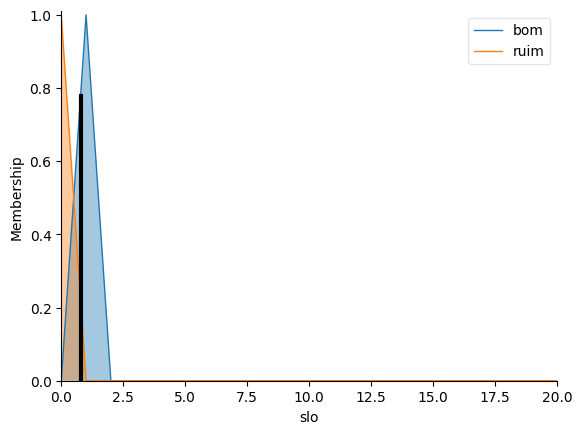

In [ ]:
print(sistema.output['slo'])
slo.view(sim = sistema)